### Zomato Dataset Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd.set_option('display.max_columns',1000)

In [83]:
dd=pd.read_excel('Country-Code_zomato.xlsx')

In [3]:
d=pd.read_csv('zomato.csv',encoding='latin-1')

In [85]:
nd=dd.merge(d,on='Country Code',how='right')

In [86]:
nd.shape

(9542, 22)

In [87]:
nd.head(2)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Phillipines,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,162,Phillipines,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [99]:
nd['Country'].value_counts()

India             8652
United States      425
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [91]:
labels=nd['Country'].value_counts().index

In [93]:
values=nd['Country'].value_counts().values

([<matplotlib.patches.Wedge at 0x199be7e50a0>,
 [Text(-1.083531565863807, 0.189629496061996, 'India'),
  Text(1.0779194567879458, -0.21929351262173782, 'United States'),
  Text(1.0995857034695016, -0.03018742661244155, 'United Kingdom')],
 [Text(-0.5910172177438947, 0.10343427057927053, '94.49%'),
  Text(0.5879560673388794, -0.1196146432482206, '4.64%'),
  Text(0.5997740200742735, -0.016465869061331753, '0.87%')])

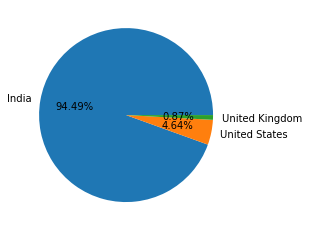

In [105]:
plt.pie(values[:3],labels=labels[:3],autopct='%1.2f%%')

In [112]:
ratings=nd.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating_Count'})

In [113]:
ratings

,Aggregate rating,Rating color,Rating text,Rating_Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [ ]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})


In [116]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating_Count'>

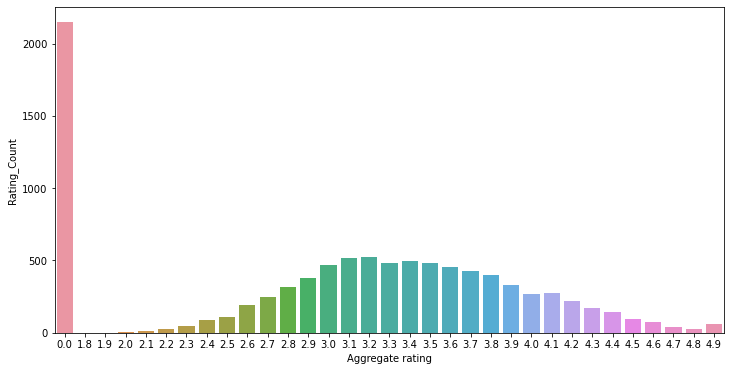

In [121]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='Aggregate rating',y='Rating_Count',data=ratings)

In [ ]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating_Count'>

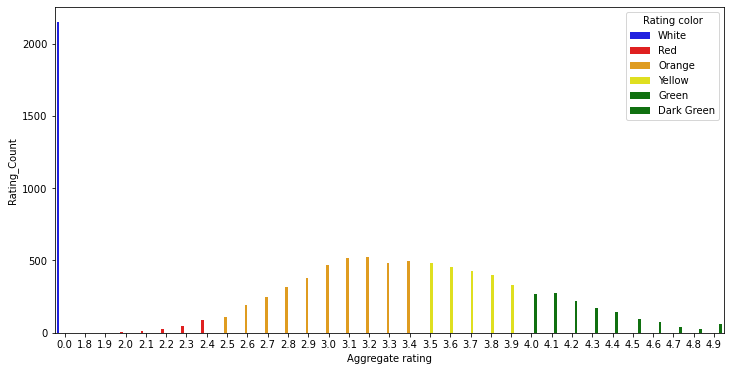

In [126]:
sns.barplot(x='Aggregate rating',y='Rating_Count',hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

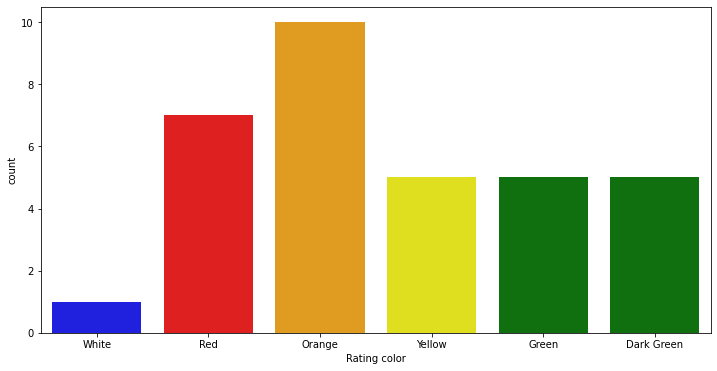

In [127]:
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [137]:
### Countries name that has given 0 rating 

In [136]:
nd[nd['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [138]:
### Countries name ALONGWITH rating_count that has given 0 rating 

In [142]:
nd.groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


In [143]:
nd[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [145]:
## Countries that have online deliveries option

In [150]:
nd[nd['Has Online delivery']=='Yes'].groupby('Country').size()

Country
India    2423
UAE        28
dtype: int64

In [151]:
nd[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [152]:
## Pie chart for top 5 cities distribution

In [157]:
nd['City'].value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Ahmedabad',
       'Guwahati', 'Amritsar', 'Bhubaneshwar', 'Lucknow',
       ...
       'Mc Millan', 'Mayfield', 'Macedon', 'Mohali', 'Lorn', 'Lincoln',
       'Lakeview', 'Lakes Entrance', 'Inverloch', 'Panchkula'],
      dtype='object', length=140)

In [158]:
nd['City'].value_counts().values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   19,   19,   19,   19,   19,   18,
         18,   17,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

In [159]:
city_values=nd.City.value_counts().values
city_labels=nd.City.value_counts().index

([<matplotlib.patches.Wedge at 0x199c1d7da90>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

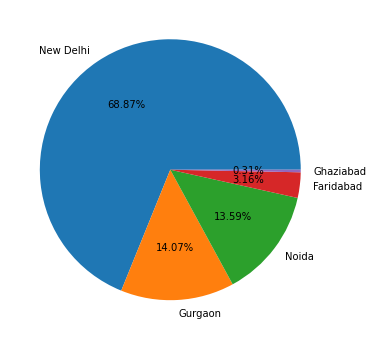

In [160]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

In [16]:
d.dropna(axis=0,inplace=True)

In [17]:
d.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [162]:
nd.shape

(9542, 22)

<AxesSubplot:>

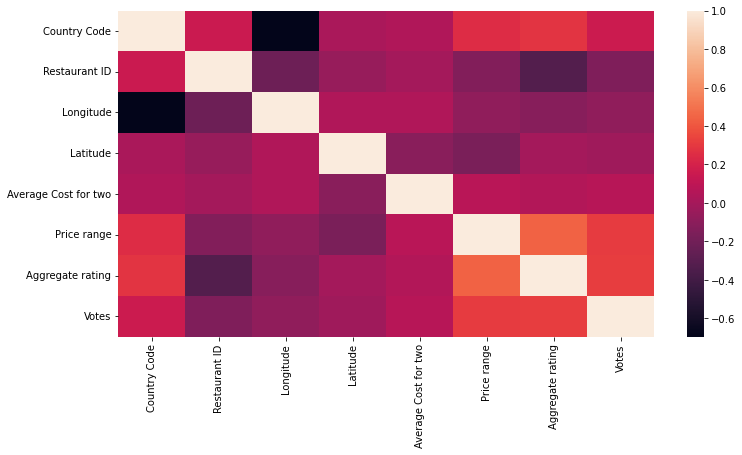

In [161]:
sns.heatmap(nd.corr())